# Playing with Images

## Converting image data structures:

In [1]:
# Importing Libraries
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import image
import os
import cv2 as cv

In [2]:
img = Image.open("Data/WhatsApp Image 2020-05-07 at 23.08.59.jpeg")

# To open in the Image Viewer
img.show()

Dimensions of the image:  (1280, 720)


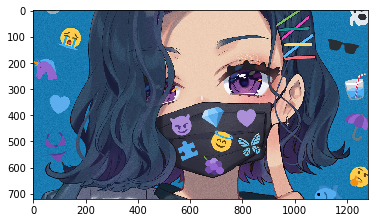

In [3]:
# To open in the Notebook
plt.imshow(img)
print("Dimensions of the image: ", img.size)

In [4]:
img_arr = np.asarray(img)
# img_arr

In [5]:
# Array to PIL image
im = Image.fromarray(np.uint8(img_arr)).convert('RGB')

Dimensions of the image:  (1280, 720)


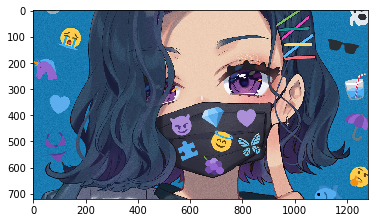

In [6]:
# To open in the Notebook
plt.imshow(im)
print("Dimensions of the image: ", im.size)

## Converting from one file format to another

In [7]:
# Checking the format of the image
img.format

'JPEG'

In [8]:
# Saving the image
img.save('Data/Lab3/JPEG-PNG.png')

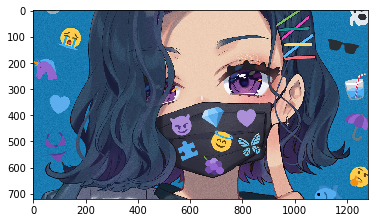

In [9]:
# Checking the saved image
img_con = Image.open('Data/Lab3/JPEG-PNG.png')
plt.imshow(img_con)

In [10]:
# Checking the dtype of the new image
img_con.format

'PNG'

## Cropping an Image

In [11]:
# Defining the params
width, height = img.size
print(width, height)

1280 720


In [12]:
left, right, top, bottom = width/4, 3 * width/4, height/4, 3 * height/4

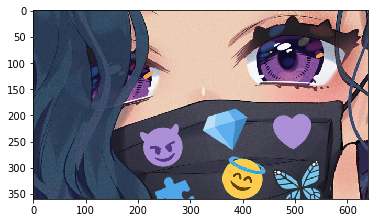

In [13]:
img_crop = img.crop((left, top, right, bottom)) 
plt.imshow(img_crop)

In [14]:
# Manually cropping 
img_arr_crop = img_arr[:, :100]
im_crop = Image.fromarray(np.uint8(img_arr_crop)).convert('RGB')

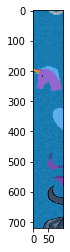

In [15]:
plt.imshow(im_crop)

## Getting the negative for an image

In [16]:
# Making a 255 value array
tup = (height, width, 3)
sub_arr = np.random.randint(255, 256, tup, int)

In [17]:
img_neg = sub_arr - np.array(img)

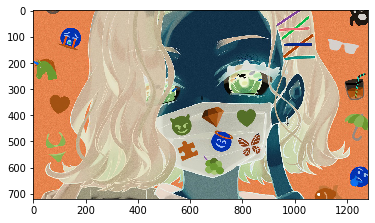

In [18]:
# Converting
im_neg = Image.fromarray(np.uint8(img_neg)).convert('RGB')
plt.imshow(im_neg)

## Masking

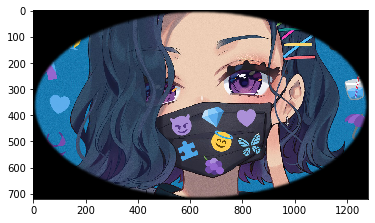

In [19]:
def mask_circle_solid(pil_img, background_color, blur_radius, offset=0):
    background = Image.new(pil_img.mode, pil_img.size, background_color)

    offset = blur_radius * 2 + offset
    mask = Image.new("L", pil_img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((offset, offset, pil_img.size[0] - offset, pil_img.size[1] - offset), fill=255)
    mask = mask.filter(ImageFilter.GaussianBlur(blur_radius))

    return Image.composite(pil_img, background, mask)

image = img.copy()
image = image
im_thumb = mask_circle_solid(image, (0, 0, 0), 4)
plt.imshow(im_thumb)

## Reading and displaying multiple images at once

In [20]:
# Importing multiple images
folder = 'Data/Lab3/'
images_mul = []
for filename in os.listdir(folder):
    img_imp = cv.cvtColor(cv.imread(os.path.join(folder,filename)), cv.COLOR_BGR2RGB)
    if img is not None:
        images_mul.append(img_imp)

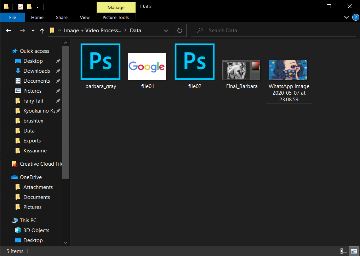

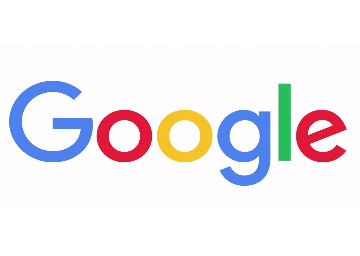

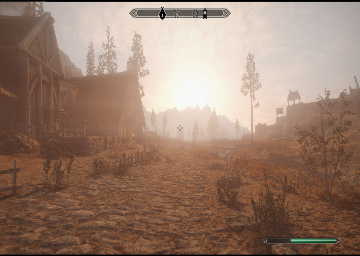

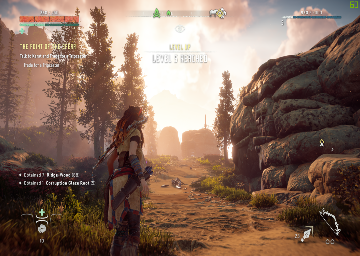

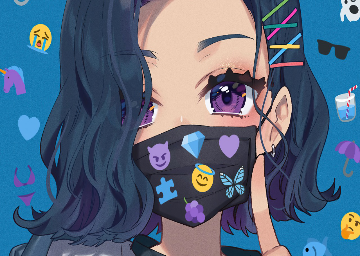

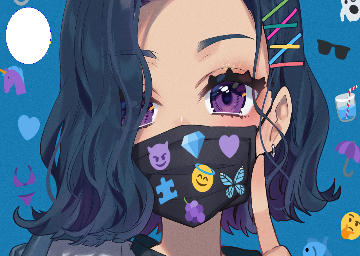

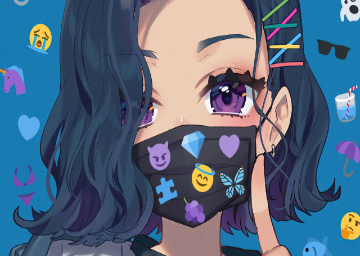

In [21]:
for i in images_mul:
    img_print = cv.resize(i, (360, 256))
    img_print = Image.fromarray(np.uint8(img_print)).convert('RGB')
    display(img_print)

## Thumbnail

True

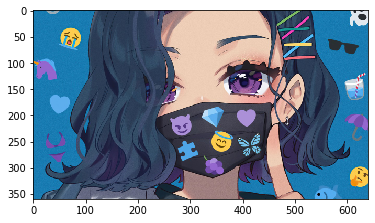

In [22]:
# Making the thumbnail
img_re = cv.imread('Data/Lab3/JPEG-PNG.png')
img_re = cv.cvtColor(img_re, cv.COLOR_BGR2RGB)
bilinear_img = cv.resize(img_re, None, fx = 0.5, fy = 0.5, interpolation = cv.INTER_LINEAR)
plt.imshow(bilinear_img)

# Converting back to BGR for saving
bilinear_img = cv.cvtColor(bilinear_img, cv.COLOR_RGB2BGR)
cv.imwrite("Data/Lab3/Thumbnail.png", bilinear_img)

In [23]:
# Attaching the thumbnail
bilinear_img = Image.open('Data/Lab3/Thumbnail.png')
img = Image.open("Data/WhatsApp Image 2020-05-07 at 23.08.59.jpeg")

back_im = img.copy()
back_im.paste(bilinear_img)

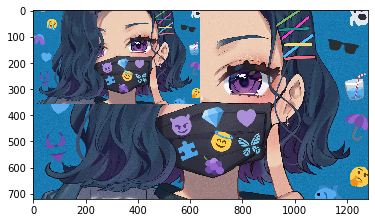

In [24]:
plt.imshow(back_im)

## Drawing

In [25]:
# To draw a shape on an image
# Resizing the input image for a smaller value
image = img.copy()
draw = ImageDraw.Draw(image)

In [26]:
draw.ellipse((20, 20, 180, 180), fill = 'white', outline ='blue')
draw.point((100, 100), 'red')
image.save('Data/Lab3/test.png')

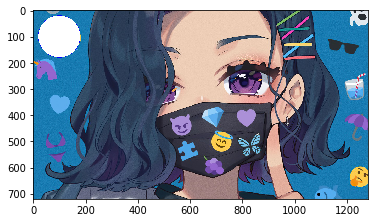

In [27]:
# Checking/Testing the image
plt.imshow(Image.open('Data/Lab3/test.png'))

In [28]:
# To write text on an image
from PIL import ImageFont

img_text = img.copy()
draw = ImageDraw.Draw(img_text)

In [29]:
# Choosing the font and size
font = ImageFont.truetype('Data/Fonts/AmsiProCond-BoldItalic.ttf', 50)

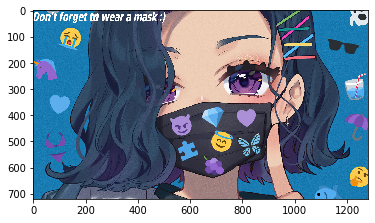

In [44]:
text = "Don't forget to wear a mask :)"
draw.text((0, 0), text, (255, 255, 255), font=font)
plt.imshow(img_text)

## Seperating the channels

**1. Via Library**

In [31]:
# Seperating using PIL
img_channels = img.split()
img_channels

(<PIL.Image.Image image mode=L size=1280x720 at 0x2C82BFFA3C8>,
 <PIL.Image.Image image mode=L size=1280x720 at 0x2C82BFFA288>,
 <PIL.Image.Image image mode=L size=1280x720 at 0x2C82C035308>)

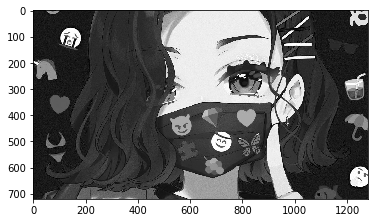

In [32]:
plt.imshow(img_channels[0], cmap='gray')

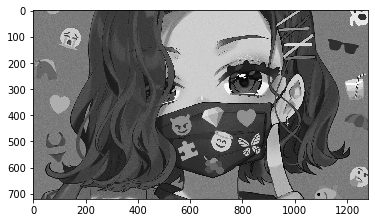

In [33]:
plt.imshow(img_channels[1], cmap='gray')

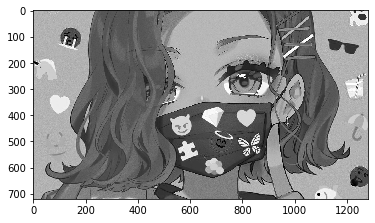

In [34]:
plt.imshow(img_channels[2], cmap='gray')

**2. Manually**

In [35]:
# Seperating manually
img_reimport = np.asarray(img)

In [36]:
# RGB channels in order
r = img_reimport[:, :, 0]
g = img_reimport[:, :, 1]
b = img_reimport[:, :, 2]

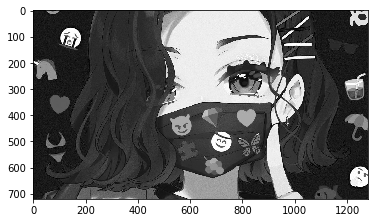

In [37]:
plt.imshow(r, cmap='gray')

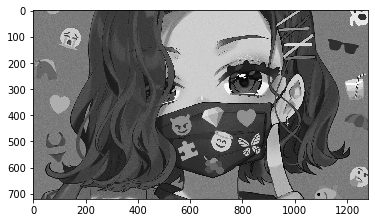

In [38]:
plt.imshow(g, cmap='gray')

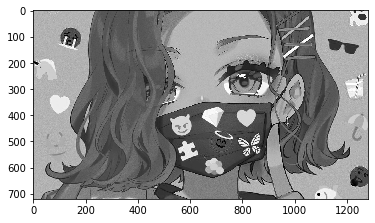

In [39]:
plt.imshow(b, cmap='gray')

**3. Recreating the image from the channels**

In [40]:
# Combining the channels
recreated_img = np.dstack((r,g,b))

In [41]:
'''Not required in this case'''

recreated_img.shape

# To change float to uint8
# rgb_uint8 = (np.dstack((r,g,b)) * 255.999) .astype(np.uint8)

(720, 1280, 3)

In [42]:
# Chekcking the original shape
img_arr.shape

(720, 1280, 3)

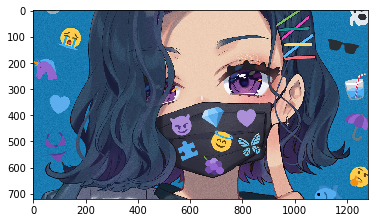

In [43]:
plt.imshow(recreated_img)